# Problem Set 3

## Problem 1: Cross-Validation and Learning Curve (6 points)

In this exercise, we will perform linear regression on a single variable. The model assumed is
$$y = \beta_0 + \sum\limits_{i=1}^p \beta_i \sin ix\pi + \sum\limits_{i=1}^p \beta_{i+p} \cos ix\pi \, ,$$
with a single free parameter $p \in \mathbb{N}$. This model is conceptually very similar to a so-called (real-valued) discrete Fourier transform.

Below, you are provided with a class, `FourierRegression`, that performs this regression as a function of $p$ and follows the general `scikit-learn` `fit` and `predict` API. You also have a training set `X_train` and `y_train`. A test or validation set is not explicitly provided since we will be using hold-out validation in this exercise.

(a) Perform a $k$-fold cross-validation with $k=10$ for $p=1, 2,..., 100$. Plot the mean $R^2$ test score as a function of $p$. Which model among the $100$ tested performs best? (Hint: You can use `sklearn.model_selection.GridSearchCV`.)

(b) Plot the learning curves for $p=2$, $5$, $10$, $20$, and $50$. The learning curves indicates the mean training and test scores as a function of $n$, the number of data points used for training. Among the tested values of $p$, which model performs best when the training set size is:

* $n=10$,
* $n=100$, and
* $n=1000$?

(Hint: You can use `sklearn.model_selection.learning_curve`. Also, you probably want to limit the $y$-range in the plot to $R^2 \geq 0$ and make the $x$-axis logarithmic.)

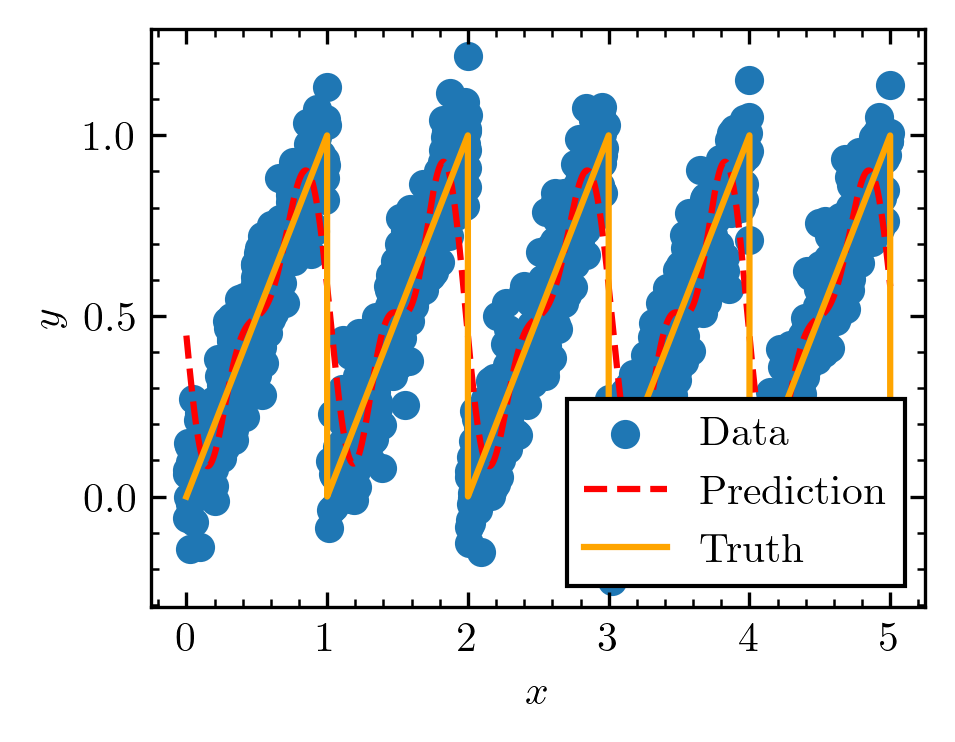

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

def f(X):
    return X[:, 0] % 1

class FourierRegression(BaseEstimator, RegressorMixin):

    # initiate regression model and specify p-value
    def __init__(self, p=1):
        self.p = p

    # create design matrix
    def design_matrix(self, X):
        return np.column_stack(
            [np.ones(len(X))] +
            [np.sin(X * np.pi * i) for i in range(1, self.p + 1)] +
            [np.cos(X * np.pi * i) for i in range(1, self.p + 1)])

    # fit beta values
    def fit(self, X, y):
        X = self.design_matrix(X)
        self.beta = np.linalg.lstsq(X, y)[0]
        return self

    # predict y-values
    def predict(self, X):
        X = self.design_matrix(X)
        return X @ self.beta

# create training data (psuedo-random)
np.random.seed(0)
X_train = np.random.uniform(0, 5, size=1250).reshape(-1, 1)
y_train = f(X_train) + np.random.normal(size=len(X_train)) * 0.1

# plot training data
plt.scatter(X_train[:, 0], y_train, label='Data')

# beta values for p = 5
reg = FourierRegression(p=5).fit(X_train, y_train)

# generate values for design matrix
X = np.linspace(0, 5, 10000).reshape(-1, 1)

# predict and plot y-values
plt.plot(X[:, 0], reg.predict(X), color='red', ls='--', label='Prediction')
# overplot truth
plt.plot(X[:, 0], f(X), color='orange', ls='-', label='Truth')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc='best')

(a) Perform a $k$-fold cross-validation with $k=10$ for $p=1, 2,..., 100$. Plot the mean $R^2$ test score as a function of $p$. Which model among the $100$ tested performs best? (Hint: You can use `sklearn.model_selection.GridSearchCV`.)

(b) Plot the learning curves for $p=2$, $5$, $10$, $20$, and $50$. The learning curves indicates the mean training and test scores as a function of $n$, the number of data points used for training. Among the tested values of $p$, which model performs best when the training set size is:

* $n=10$,
* $n=100$, and
* $n=1000$?

(Hint: You can use `sklearn.model_selection.learning_curve`. Also, you probably want to limit the $y$-range in the plot to $R^2 \geq 0$ and make the $x$-axis logarithmic.)

In [ ]:
from sklearn.metrics import r2_score
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV

def f(X):
    return X[:, 0] % 1

class FourierRegression(BaseEstimator, RegressorMixin):
    # initiate regression model and specify p-value
    def __init__(self, p=1):
        self.p = p

    # create design matrix
    def design_matrix(self, X):
        return np.column_stack(
            [np.ones(len(X))] +
            [np.sin(X * np.pi * i) for i in range(1, self.p + 1)] +
            [np.cos(X * np.pi * i) for i in range(1, self.p + 1)])

    # fit beta values
    def fit(self, X, y):
        X = self.design_matrix(X)
        self.beta = np.linalg.lstsq(X, y)[0]
        return self

    # predict y-values
    def predict(self, X):
        X = self.design_matrix(X)
        return X @ self.beta

# create training data (psuedo-random)
np.random.seed(0)
X_train = np.random.uniform(0, 5, size=1250).reshape(-1, 1)
y_train = f(X_train) + np.random.normal(size=len(X_train)) * 0.1

k = 10
for p in range(1, 101):
    model = FourierRegression(p).fit(X_train, y_train)
    y_pred_p = model.predict(X_train)
    r2 = r2_score(y_train, y_pred_p)